# Filter Bank Creation

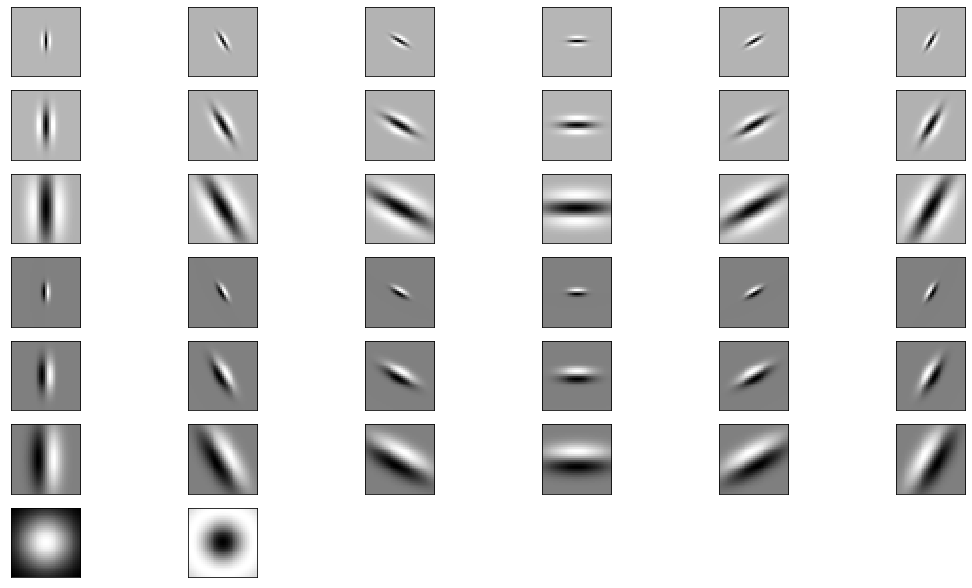

In [1]:
##########################################################################
# Maximum Response filterbank from
# http://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html
# based on several edge and bar filters.
# Adapted to Python by Andreas Mueller amueller@ais.uni-bonn.de
# Share and enjoy
#

import numpy as np
import matplotlib.pyplot as plt
from itertools import product, chain
from scipy import misc,ndimage
from os import listdir
import os
from os.path import isfile, join
import imageio
#from sklearn.externals.joblib import Parallel, delayed


def makeRFSfilters(radius=18, sigmas=[1, 2, 4], n_orientations=6):
    """ Generates filters for RFS filterbank.
    Parameters
    ----------
    radius : int, default 24
        radius of all filters. Size will be 2 * radius + 1
    sigmas : list of floats, default [1, 2, 4]
        define scales on which the filters will be computed
    n_orientations : int
        number of fractions the half-angle will be divided in
    Returns
    -------
    edge : ndarray (len(sigmas), n_orientations, 2*radius+1, 2*radius+1)
        Contains edge filters on different scales and orientations
    bar : ndarray (len(sigmas), n_orientations, 2*radius+1, 2*radius+1)
        Contains bar filters on different scales and orientations
    rot : ndarray (2, 2*radius+1, 2*radius+1)
        contains two rotation invariant filters, Gaussian and Laplacian of
        Gaussian
    """
    def make_gaussian_filter(x, sigma, order=0):
        if order > 2:
            raise ValueError("Only orders up to 2 are supported")
        # compute unnormalized Gaussian response
        response = np.exp(-x ** 2 / (2. * sigma ** 2))
        if order == 1:
            response = -response * x
        elif order == 2:
            response = response * (x ** 2 - sigma ** 2)
        # normalize
        response /= np.abs(response).sum()
        return response

    def makefilter(scale, phasey, pts, sup):
        gx = make_gaussian_filter(pts[0, :], sigma=3 * scale)
        gy = make_gaussian_filter(pts[1, :], sigma=scale, order=phasey)
        f = (gx * gy).reshape(sup, sup)
        # normalize
        f /= np.abs(f).sum()
        return f

    support = 2 * radius + 1
    x, y = np.mgrid[-radius:radius + 1, radius:-radius - 1:-1] #Make the filter grid
    orgpts = np.vstack([x.ravel(), y.ravel()])
    sigma_arr = []
    rot, edge, bar = [], [], []
    for sigma in sigmas:
        for orient in range(n_orientations):
            # Not 2pi as filters have symmetry
            angle = np.pi * orient / n_orientations
            c, s = np.cos(angle), np.sin(angle) #Get the angle 
            rotpts = np.dot(np.array([[c, -s], [s, c]]), orgpts) #rotate the grid

            edge.append(makefilter(sigma, 1, rotpts, support))
            bar.append(makefilter(sigma, 2, rotpts, support))

            sigma_arr.append(sigma)
            sigma_arr.append(sigma)
    
    length = np.sqrt(x ** 2 + y ** 2)
    rot.append(make_gaussian_filter(length, sigma=10))
    sigma_arr.append(10)
    rot.append(make_gaussian_filter(length, sigma=10, order=2))
    sigma_arr.append(10)

    # reshape rot and edge
    edge = np.asarray(edge)
    edge = edge.reshape(len(sigmas), n_orientations, support, support)
    bar = np.asarray(bar).reshape(edge.shape)
    rot = np.asarray(rot)[:, np.newaxis, :, :]
    return edge, bar, rot, sigma_arr

#Apply Filter by convolving with the image
def apply_filterbank(img, filterbank):
    from scipy.ndimage import convolve
    result = []
    for battery in filterbank:
        response = [convolve(img, filt) for filt in battery]
        #max_response = np.max(response, axis=0)
        result.extend(response)
    return result



sigmas = [1, 2, 4]
n_sigmas = len(sigmas)
n_orientations = 6

#Make Filters here
edge, bar, rot, sigma_arr = makeRFSfilters(sigmas=sigmas,
        n_orientations=n_orientations)

n = n_sigmas * n_orientations


# plot filters
# 2 is for bar / edge, + 1 for rot
fig, ax = plt.subplots(n_sigmas * 2 + 1, n_orientations)
filters_arr = []
for k, filters in enumerate([bar, edge]):
    for i, j in product(range(n_sigmas), range(n_orientations)):
        row = i + k * n_sigmas
        filters_arr.append(filters[i, j, :, :])
        ax[row, j].imshow(filters[i, j, :, :], cmap=plt.cm.gray)
        ax[row, j].set_xticks(())
        ax[row, j].set_yticks(())

filters_arr.append(rot[0, 0])
filters_arr.append(rot[1, 0])
ax[-1, 0].imshow(rot[0, 0], cmap=plt.cm.gray)
ax[-1, 0].set_xticks(())
ax[-1, 0].set_yticks(())
ax[-1, 1].imshow(rot[1, 0], cmap=plt.cm.gray)
ax[-1, 1].set_xticks(())
ax[-1, 1].set_yticks(())

fig.set_size_inches(18.5, 10.5)
for i in range(2, n_orientations):
    ax[-1, i].set_visible(False)


# Insert Image Here

Shape of Image =  (550, 366)


(-0.5, 365.5, 549.5, -0.5)

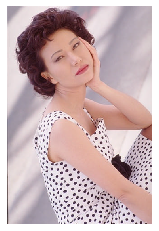

In [2]:
import cv2
test_images_path = "lady.png"

img = cv2.imread(test_images_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# scale_percent = 60
# width = int(img.shape[1] * scale_percent / 100)
# height = int(img.shape[0] * scale_percent / 100)
# dim = (width, height)
# img = cv2.resize(img, dim)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_shape = img_gray.shape
print("Shape of Image = ", img_shape)
plt.imshow(img)
plt.axis("off")

### Image Segmentation using Colors

(550, 366)


Text(0.5, 1.0, 'Clustering with RGB Colors')

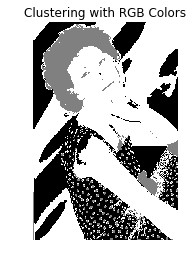

In [25]:
# Apply kmeans image segmentation using colored image. Take number of clusters = 4.
# What is the problem with the clusters output? Does it really segment meaningfull segments?

In [3]:
#Apply Filter Bank to Gray Scale Image
filterbank = chain(edge, bar, rot)

response_m = 
print("Length of response ", len(response_m))
print("Filter Banks Applied !!!")


Length of response  38
Filter Banks Applied !!!


# Visualize Images

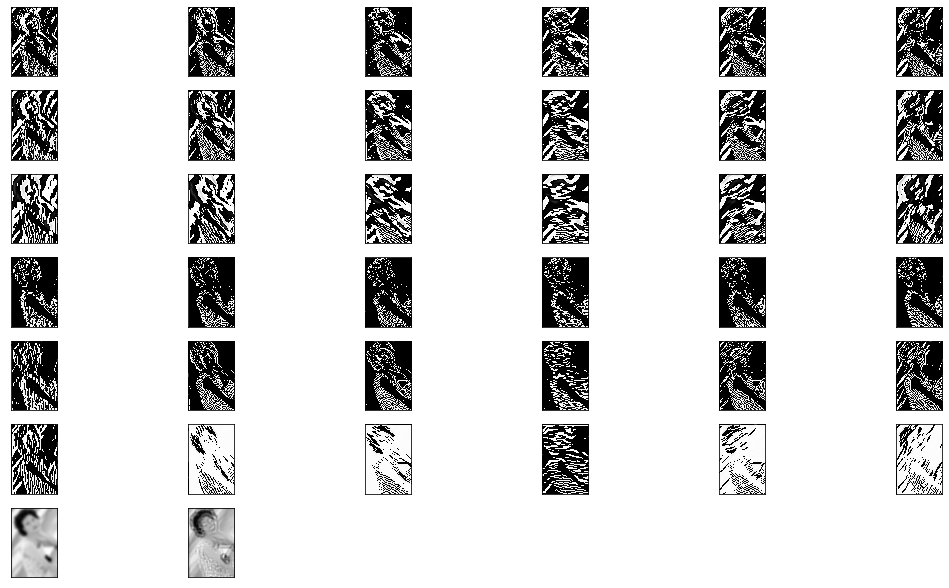

In [5]:
# plot responses
fig2, ax2 = plt.subplots(7, 6)
for axes, res in zip(ax2.ravel(), response_m):
    axes.imshow(res, cmap="gray")
    axes.set_xticks(())
    axes.set_yticks(())
    
fig2.set_size_inches(18.5, 10.5)

ax2[-1, 2].set_visible(False)
ax2[-1, 3].set_visible(False)
ax2[-1, 4].set_visible(False)
ax2[-1, 5].set_visible(False)

plt.show()

### 1. Form histograms from the clustered textons for each patch (window of size 7) of image

In [ ]:
window = 7
patch_hists = []
num_of_textons = 5;
# take histogram 
center = window // 2

new_shape_x = len(range(center, img_shape[0], window))
new_shape_y = len(range(center, img_shape[1], window))

### 2. Form the cluster with these histogram outputs and plot your final segmented image

### Image Segmentation with direct Kmeans of Gabor Magnitudes

Shape of gabor mag =  (38, 550, 366)


Text(0.5, 1.0, 'Clustering without smoothing')

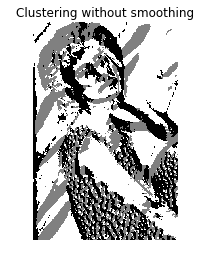

In [23]:

from sklearn.cluster import KMeans
gabor_mag_wo_sm = np.array(response_m)
print("Shape of gabor mag = ", gabor_mag_wo_sm.shape)

value = gabor_mag_wo_sm.reshape((-1, img_shape[0] * img_shape[1]))

# direct clustering and visualization
cluster_model = KMeans(n_clusters=3).fit(value.T)
cluster_labels = cluster_model.labels_

result = cluster_labels.reshape((img_shape[0], img_shape[1]))

plt.imshow(result, cmap='gray')
plt.axis("off")
plt.title("Clustering without smoothing")

### Image Segmentation with smoothing and normalization of gabor filters

Shape of gabor mag =  (38, 550, 366)


Text(0.5, 1.0, 'Clustering after normalizaton and smoothing')

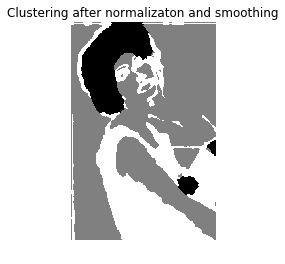

In [24]:
from sklearn.cluster import KMeans
from skimage.filters import gaussian

# apply gaussian smoothing
gabor_mag = []
for i, values in enumerate(response_m):
    # the value of sigma is chosen to be half of the applied frequency

    sigma = sigma_arr[i]
    smoothed = gaussian(values, sigma = sigma)                 # Smoothen the image
    smoothed = (smoothed - smoothed.mean()) / smoothed.var()   # Normalize the image
    gabor_mag.append(smoothed)


gabor_mag = np.array(gabor_mag)
print("Shape of gabor mag = ", gabor_mag.shape)

value = gabor_mag.reshape((-1, img_shape[0]*img_shape[1]))

# get dimensionally reduced image
cluster_model_norm_smooth = KMeans(n_clusters=3).fit(value.T)
cluster_labels_norm_smooth = cluster_model_norm_smooth.labels_

result = cluster_labels_norm_smooth.reshape((img_shape[0], img_shape[1]))

plt.imshow(result, cmap='gray')
plt.axis("off")
plt.title("Clustering after normalizaton and smoothing")